## Rating Prediction 

In [ ]:
# imp libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving malignant_train.csv to malignant_train.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['malignant_train.csv']))
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving malignant_test.csv to malignant_test.csv


In [ ]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded2['malignant_test.csv']))
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
print('df shape', df.shape)
print('df_test shape', df_test.shape)


df shape (159571, 8)
df_test shape (153164, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Null value checking

In [ ]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [ ]:
df_test.isnull().sum().sum()

0

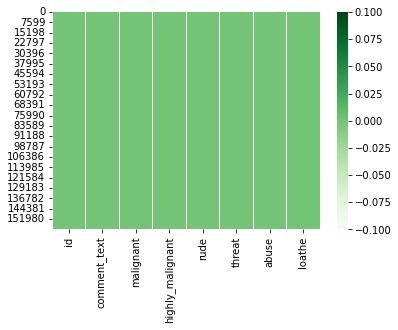

In [ ]:
sns.heatmap(df.isnull(), cmap = 'Greens')

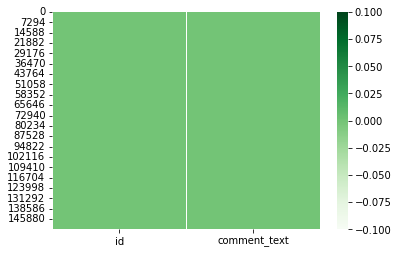

In [ ]:
sns.heatmap(df_test.isnull(), cmap = 'Greens')

## Data Preprocessing

In [ ]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [ ]:
# New column for length of message
df['Length of comment_text'] = df['comment_text'].str.len()
df_test['Length of comment_text'] = df_test['comment_text'].str.len()

In [ ]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Length of comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [ ]:
# Converting all msges into lower case
df['comment_text'] = df['comment_text'].apply(lambda x:x.lower())
df_test['comment_text'] = df_test['comment_text'].apply(lambda x:x.lower())
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Length of comment_text
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [ ]:
# Replace email address with email:[
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email_address')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email_address')

In [ ]:
# Replace URL with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

In [ ]:
# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$', 'dollers')

In [ ]:
# Replace 10 digit phone numbers (formats include paranthesis spaces, no spaces, dashed) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone_number')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone_number')

In [ ]:
# Replace numbers with 'number'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')

In [ ]:
# Remove punctuation
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'[^\w\d\s]', ' ')

In [ ]:
# Replace whitespace between terms with a single space:
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\s+', ' ')

In [ ]:
# Remove leading and trailing whitespace
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', ' ')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+|\s+?$', ' ')

In [ ]:
df_test.head()

,id,comment_text,Length of comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...,367
1,0000247867823ef7,from rfc the title is fine as it is imo,50
2,00013b17ad220c46,sources zawe ashton on lapland,54
3,00017563c3f7919a,if you have a look back at the source the inf...,205
4,00017695ad8997eb,i don t anonymously edit articles at all,41


In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + ['u', 'ur', '4', '2','im','dont', 'doin', 'ure']
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop_words ))
df_test['comment_text'] = df_test['comment_text'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop_words ))

In [ ]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Length of comment_text
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67


In [ ]:
# New column length after removing unwanted crupt data
df['Len of clean comment'] = df.comment_text.str.len()
df_test['Len of clean comment'] = df_test.comment_text.str.len()

In [ ]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Length of comment_text,Len of clean comment
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,172
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,97
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29


In [ ]:
# total reduced length
print("Original Length: ",df['Length of comment_text'].sum())
print("Cleaned Length: ",df['Len of clean comment'].sum())

Original Length:  62893130
Cleaned Length:  40723981


In [ ]:
# total reduced length
print("Original Length: ",df_test['Length of comment_text'].sum())
print("Cleaned Length: ",df_test['Len of clean comment'].sum())

Original Length:  55885733
Cleaned Length:  36136856


## Countplot

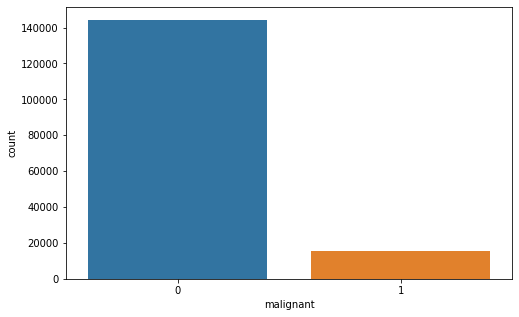

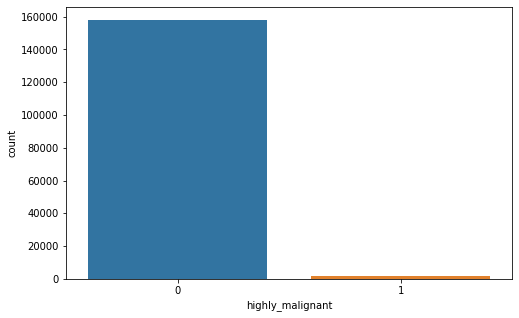

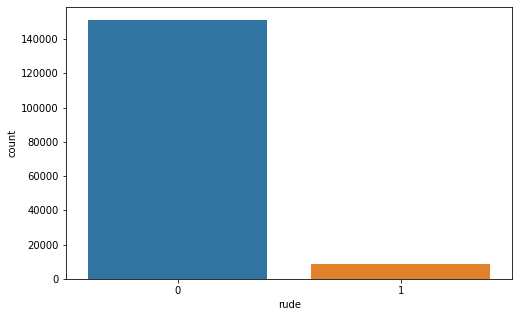

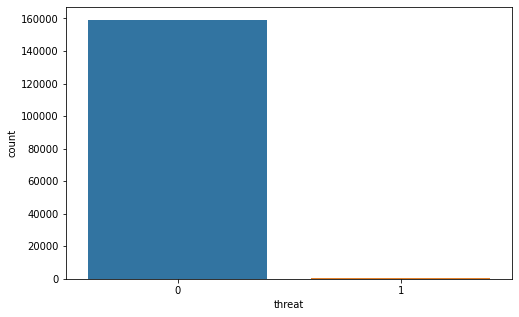

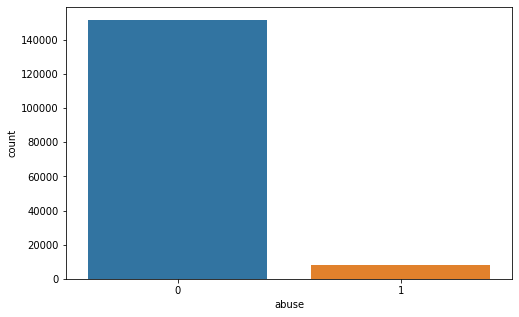

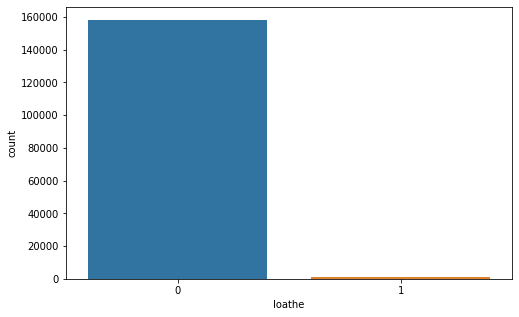

In [ ]:
lst = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
for i in lst:
    plt.figure(figsize = (8,5))
    sns.countplot(df[i])

In [ ]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Length of comment_text', 'Len of clean comment'],
      dtype='object')

In [ ]:
df_test.columns

Index(['id', 'comment_text', 'Length of comment_text', 'Len of clean comment'], dtype='object')

### Review text Distribution before Cleaning

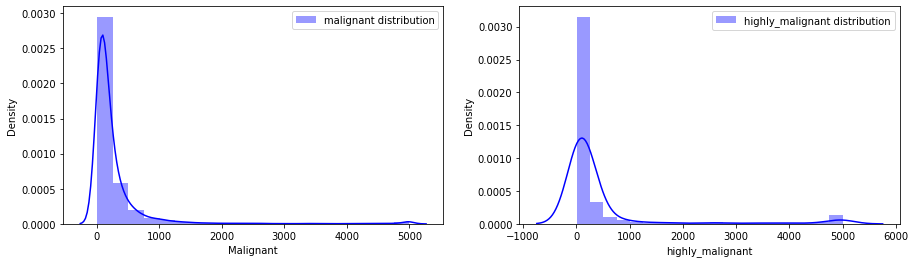

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = (15,4))

sns.distplot( df[df['malignant'] ==1]['Length of comment_text'], bins = 20 , ax = ax[0], label = 'malignant distribution', color = 'b' )
ax[0].set_xlabel('Malignant')
ax[0].legend()

sns.distplot( df[df['highly_malignant']==1]['Length of comment_text'], bins = 20, ax = ax[1], label = 'highly_malignant distribution', color = 'b')
ax[1].set_xlabel('highly_malignant')
ax[1].legend()

In [ ]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Length of comment_text', 'Len of clean comment'],
      dtype='object')

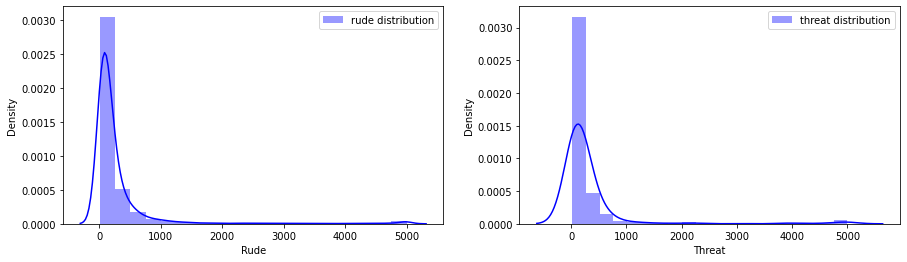

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = (15,4))

sns.distplot( df[df['rude'] ==1]['Length of comment_text'], bins = 20 , ax = ax[0], label = 'rude distribution', color = 'b' )
ax[0].set_xlabel('Rude')
ax[0].legend()

sns.distplot( df[df['threat']==1]['Length of comment_text'], bins = 20, ax = ax[1], label = 'threat distribution', color = 'b')
ax[1].set_xlabel('Threat')
ax[1].legend()

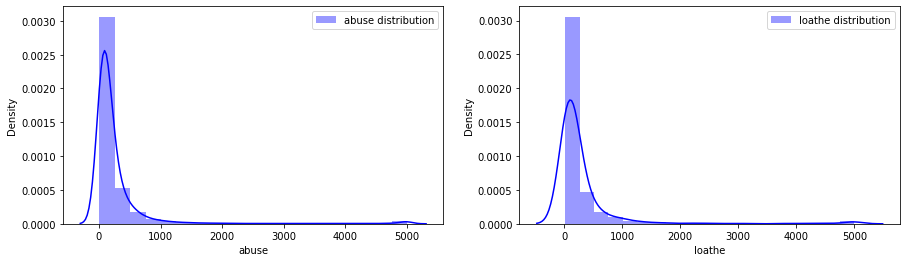

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = (15,4))

sns.distplot( df[df['abuse'] ==1]['Length of comment_text'], bins = 20 , ax = ax[0], label = 'abuse distribution', color = 'b' )
ax[0].set_xlabel('abuse')
ax[0].legend()

sns.distplot( df[df['loathe']==1]['Length of comment_text'], bins = 20, ax = ax[1], label = 'loathe distribution', color = 'b')
ax[1].set_xlabel('loathe')
ax[1].legend()

In [ ]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Length of comment_text', 'Len of clean comment'],
      dtype='object')

### Message distribution after cleaning

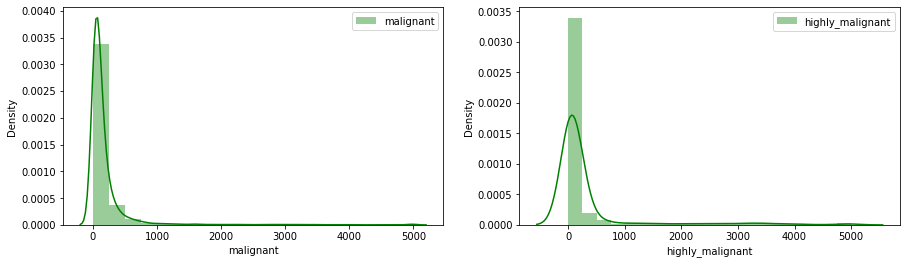

In [ ]:
f, ax = plt.subplots(1,2,figsize = (15,4))

sns.distplot( df[df['malignant'] ==1]['Len of clean comment'] , bins = 20, ax = ax[0], label = 'malignant', color = 'g' )
ax[0].set_xlabel('malignant')
ax[0].legend()


sns.distplot( df[df['highly_malignant']==1]['Len of clean comment'], bins = 20, ax = ax[1], label = 'highly_malignant', color = 'g')
ax[1].set_xlabel('highly_malignant')
ax[1].legend()

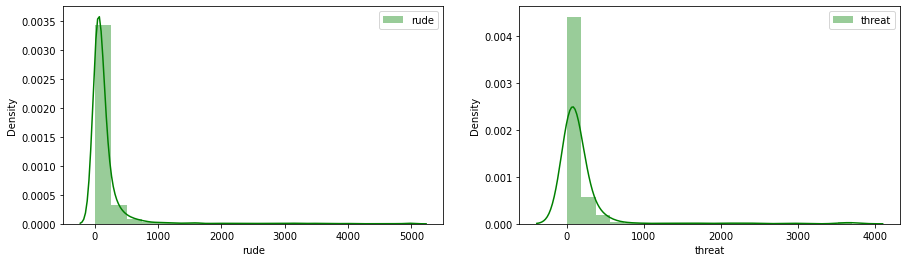

In [ ]:
f, ax = plt.subplots(1,2,figsize = (15,4))

sns.distplot( df[df['rude'] ==1]['Len of clean comment'] , bins = 20, ax = ax[0], label = 'rude', color = 'g' )
ax[0].set_xlabel('rude')
ax[0].legend()


sns.distplot( df[df['threat']==1]['Len of clean comment'], bins = 20, ax = ax[1], label = 'threat', color = 'g')
ax[1].set_xlabel('threat')
ax[1].legend()

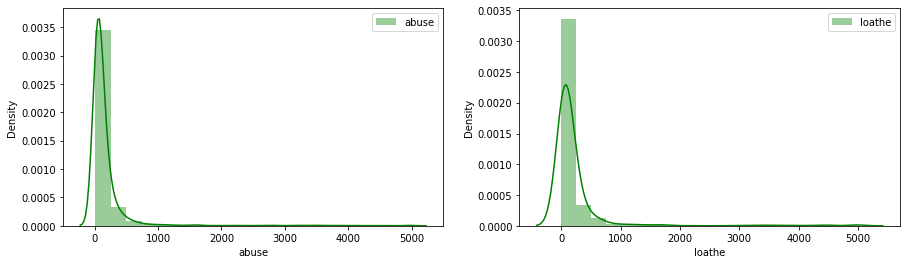

In [ ]:
f, ax = plt.subplots(1,2,figsize = (15,4))

sns.distplot( df[df['abuse'] ==1]['Len of clean comment'] , bins = 20, ax = ax[0], label = 'abuse', color = 'g' )
ax[0].set_xlabel('abuse')
ax[0].legend()


sns.distplot( df[df['loathe']==1]['Len of clean comment'], bins = 20, ax = ax[1], label = 'loathe', color = 'g')
ax[1].set_xlabel('loathe')
ax[1].legend()

**Getting sense of loud words in spam**

In [ ]:
!python -m pip install --upgrade pip
!pip install wordcloud

     |████████████████████████████████| 2.1 MB 5.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
from wordcloud import WordCloud 
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Length of comment_text', 'Len of clean comment'],
      dtype='object')

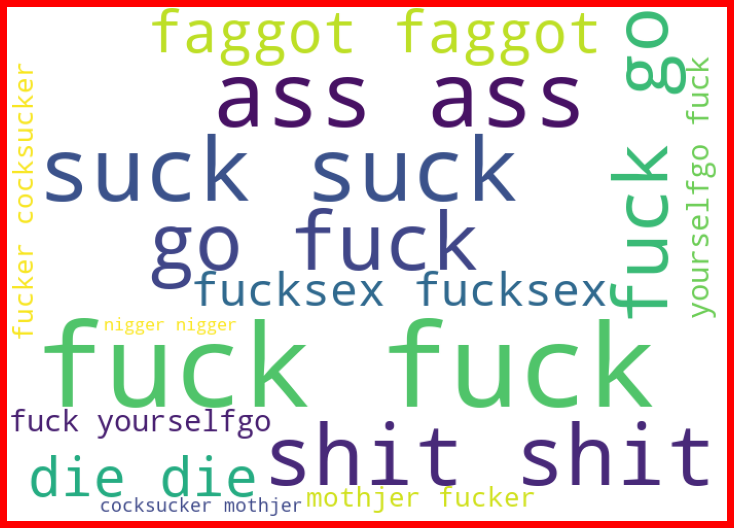

In [ ]:
highly_malig = df['comment_text'][df['highly_malignant']==1]

hmali_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(highly_malig))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(hmali_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

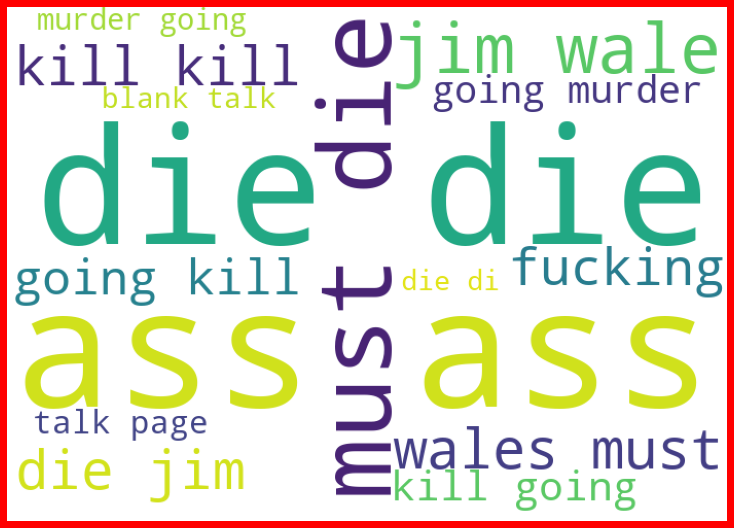

In [ ]:
threat = df['comment_text'][df['threat']==1]

threat_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(threat))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

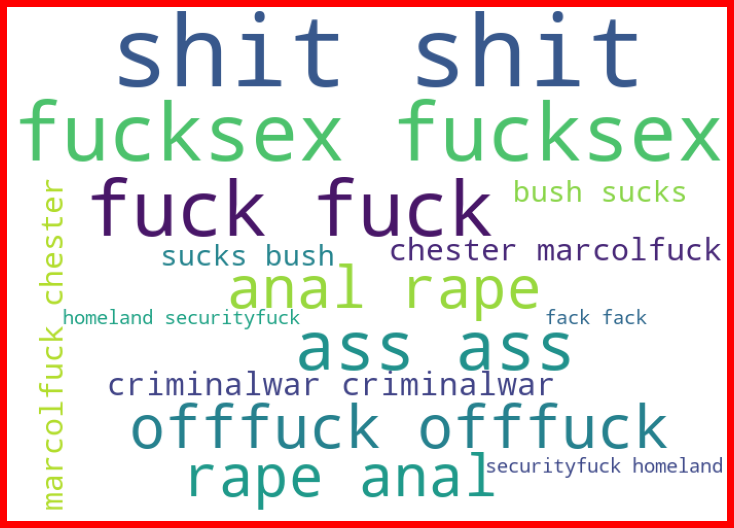

In [ ]:
highly_malig = df['comment_text'][df['highly_malignant']==1][df['abuse']==0]

hmali_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(highly_malig))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(hmali_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

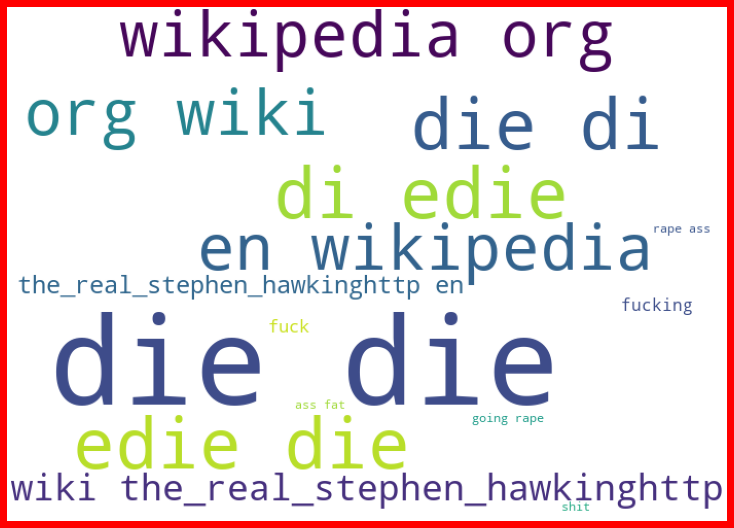

In [ ]:
all_one = df['comment_text'][df['highly_malignant']==1][df['abuse']==1][df['threat']==1][df['rude']==1][df['malignant']==1][df['loathe']==1]

all_cloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(all_one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(all_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

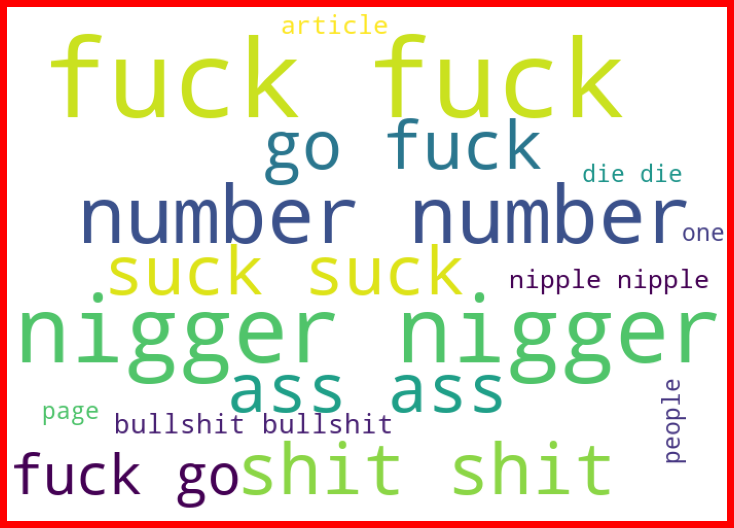

In [ ]:
rude = df['comment_text'][df['rude']==1]

rudecloud = WordCloud(width=700,height=500,background_color='white',max_words=15).generate(' '.join(rude))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rudecloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### TfidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.sparse import csr_matrix

In [ ]:
tf_vec = TfidfVectorizer()
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Length of comment_text', 'Len of clean comment'],
      dtype='object')

In [ ]:
tf_vec = TfidfVectorizer()
tf_vec.fit(df['comment_text'])


TfidfVectorizer()

In [ ]:
features = tf_vec.transform(df['comment_text'])

In [ ]:
x = features

In [ ]:
x.shape

(159571, 180221)

In [ ]:
y = df[['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']]

#### Tf vectorization for Testing data

In [ ]:
df_test.columns

Index(['id', 'comment_text', 'Length of comment_text', 'Len of clean comment'], dtype='object')

In [ ]:
features2 = tf_vec.transform(df_test['comment_text'])

In [ ]:
test_x = features2

In [ ]:
test_x.shape

(153164, 180221)

In [ ]:
print('x shape: ', x.shape)
print('y shape: ', y.shape)

x shape:  (159571, 180221)
y shape:  (159571, 6)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from sklearn.metrics import multilabel_confusion_matrix, f1_score
from sklearn.multiclass import OneVsRestClassifier
naive = MultinomialNB()

## Machine Learning

### MultinomialNB

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=21)

In [ ]:
model = OneVsRestClassifier(  ()).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred, y_test))
print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

Accuracy Score 0.8977690508021391
Classification Report: 
               precision    recall  f1-score   support

           0       0.16      0.98      0.28       759
           1       0.00      0.00      0.00         5
           2       0.10      0.96      0.18       262
           3       0.01      0.33      0.01         3
           4       0.03      0.87      0.06        90
           5       0.00      0.00      0.00         5

   micro avg       0.10      0.96      0.18      1124
   macro avg       0.05      0.52      0.09      1124
weighted avg       0.13      0.96      0.23      1124
 samples avg       0.01      0.02      0.01      1124

Confusion Matrix: 
 [[[43210    14]
  [ 3903   745]]

 [[47351     5]
  [  516     0]]

 [[45290    11]
  [ 2320   251]]

 [[47720     2]
  [  149     1]]

 [[45469    12]
  [ 2313    78]]

 [[47435     5]
  [  432     0]]]


In [ ]:
from sklearn.ensemble import DecisionTreeClassifier

In [ ]:
model = OneVsRestClassifier(DecisionTreeClassifier()).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred, y_test))
print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

Accuracy Score 0.8938210227272727
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      4428
           1       0.23      0.34      0.28       354
           2       0.77      0.77      0.77      2576
           3       0.19      0.30      0.24        96
           4       0.61      0.63      0.62      2341
           5       0.32      0.45      0.38       313

   micro avg       0.65      0.68      0.66     10108
   macro avg       0.47      0.53      0.50     10108
weighted avg       0.66      0.68      0.67     10108
 samples avg       0.06      0.06      0.06     10108

Confusion Matrix: 
 [[[41986  1238]
  [ 1458  3190]]

 [[47123   233]
  [  395   121]]

 [[44696   605]
  [  600  1971]]

 [[47655    67]
  [  121    29]]

 [[44609   872]
  [  922  1469]]

 [[47267   173]
  [  292   140]]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = OneVsRestClassifier(KNeighborsClassifier()).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred, y_test))
print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

Accuracy Score 0.8333054812834224
Classification Report: 
               precision    recall  f1-score   support

           0       0.23      0.24      0.24      4533
           1       0.09      0.40      0.15       116
           2       0.20      0.24      0.22      2162
           3       0.06      0.82      0.11        11
           4       0.14      0.76      0.24       438
           5       0.06      0.60      0.10        40

   micro avg       0.19      0.28      0.23      7300
   macro avg       0.13      0.51      0.18      7300
weighted avg       0.22      0.28      0.23      7300
 samples avg       0.02      0.02      0.02      7300

Confusion Matrix: 
 [[[39782  3442]
  [ 3557  1091]]

 [[47286    70]
  [  470    46]]

 [[43663  1638]
  [ 2047   524]]

 [[47720     2]
  [  141     9]]

 [[45376   105]
  [ 2058   333]]

 [[47424    16]
  [  408    24]]]


In [ ]:
model = OneVsRestClassifier(LogisticRegression()).fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

print('Testing Accuracy Score',accuracy_score(y_pred, y_test))
print('Training Accuracy Score',accuracy_score(y_pred_train, y_train))

print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

Accuracy Score 0.9159634024064172
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.93      0.70      2799
           1       0.21      0.58      0.31       187
           2       0.60      0.92      0.73      1664
           3       0.09      0.78      0.17        18
           4       0.47      0.84      0.60      1342
           5       0.15      0.72      0.24        88

   micro avg       0.51      0.89      0.65      6098
   macro avg       0.35      0.79      0.46      6098
weighted avg       0.53      0.89      0.67      6098
 samples avg       0.04      0.05      0.05      6098

Confusion Matrix: 
 [[[43032   192]
  [ 2041  2607]]

 [[47277    79]
  [  408   108]]

 [[45175   126]
  [ 1033  1538]]

 [[47718     4]
  [  136    14]]

 [[45263   218]
  [ 1267  1124]]

 [[47415    25]
  [  369    63]]]


### Applying Boosting Techniques

In [ ]:
model = OneVsRestClassifier(RandomForestClassifier()).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred, y_test))
print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )


Accuracy Score 0.9136238302139037
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.93      0.69      2769
           1       0.04      0.39      0.08        59
           2       0.63      0.91      0.74      1791
           3       0.03      0.71      0.06         7
           4       0.45      0.83      0.58      1302
           5       0.05      0.68      0.09        31

   micro avg       0.50      0.89      0.64      5959
   macro avg       0.29      0.74      0.38      5959
weighted avg       0.55      0.89      0.67      5959
 samples avg       0.04      0.05      0.04      5959

Confusion Matrix: 
 [[[43026   198]
  [ 2077  2571]]

 [[47320    36]
  [  493    23]]

 [[45131   170]
  [  950  1621]]

 [[47720     2]
  [  145     5]]

 [[45256   225]
  [ 1314  1077]]

 [[47430    10]
  [  411    21]]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
model = OneVsRestClassifier(GradientBoostingClassifier()).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred, y_test))
print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

Accuracy Score 0.9091535762032086
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.94      0.57      2025
           1       0.18      0.48      0.26       192
           2       0.60      0.90      0.72      1714
           3       0.13      0.27      0.17        70
           4       0.43      0.82      0.56      1249
           5       0.28      0.51      0.36       238

   micro avg       0.44      0.86      0.58      5488
   macro avg       0.34      0.65      0.44      5488
weighted avg       0.46      0.86      0.59      5488
 samples avg       0.03      0.04      0.04      5488

Confusion Matrix: 
 [[[43096   128]
  [ 2751  1897]]

 [[47257    99]
  [  423    93]]

 [[45137   164]
  [ 1021  1550]]

 [[47671    51]
  [  131    19]]

 [[45253   228]
  [ 1370  1021]]

 [[47324   116]
  [  310   122]]]


In [ ]:
model = OneVsRestClassifier(AdaBoostClassifier()).fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Accuracy Score',accuracy_score(y_pred, y_test))
print('Classification Report: \n', classification_report(y_pred, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,y_pred) )

Accuracy Score 0.9076913435828877
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.86      0.64      2737
           1       0.25      0.45      0.32       282
           2       0.60      0.90      0.72      1724
           3       0.27      0.51      0.35        79
           4       0.38      0.81      0.52      1132
           5       0.27      0.54      0.36       219

   micro avg       0.48      0.83      0.61      6173
   macro avg       0.38      0.68      0.49      6173
weighted avg       0.49      0.83      0.61      6173
 samples avg       0.04      0.05      0.04      6173

Confusion Matrix: 
 [[[42853   371]
  [ 2282  2366]]

 [[47202   154]
  [  388   128]]

 [[45122   179]
  [ 1026  1545]]

 [[47683    39]
  [  110    40]]

 [[45263   218]
  [ 1477   914]]

 [[47339   101]
  [  314   118]]]


Hyper Parameter Tuning is applied to Logistic Regression model as it is giving best accuracy in all used ML algorithms

In [ ]:
parameters ={"estimator__penalty":["l2","none"],
          "estimator__fit_intercept":[True,False],
          "estimator__solver":["newton-cg","lbfgs","liblinear","sag","saga"]}

In [ ]:
model_to_set = OneVsRestClassifier(LogisticRegression())
model_to_set.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
model_tunning = GridSearchCV(estimator = model_to_set, param_grid=parameters, cv = 3)
model_tunning.fit(x_train, y_train)
model_tunning.best_params_

{'estimator__fit_intercept': True,
 'estimator__penalty': 'l2',
 'estimator__solver': 'liblinear'}

### Parameter are applied to Logitic model

In [ ]:
model = LogisticRegression(fit_intercept = 'True', penalty = 'l2', solver = 'liblinear')
final_model = OneVsRestClassifier(model).fit(x_train, y_train)  
prediction = final_model.predict(x_test)
prediction2 = final_model.predict(x_train)
print('Accuracy of Testing ',accuracy_score(prediction, y_test))
print('Accuracy of Training ',accuracy_score(prediction2, y_train))
print('Classification Report: \n', classification_report(prediction, y_test) )
print('Confusion Matrix: \n', multilabel_confusion_matrix(y_test,prediction) )

Accuracy of Testing  0.9159634024064172
Accuracy of Training  0.9242965469699819
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.93      0.70      2797
           1       0.21      0.58      0.31       187
           2       0.60      0.92      0.73      1663
           3       0.09      0.78      0.17        18
           4       0.47      0.84      0.60      1343
           5       0.15      0.72      0.24        88

   micro avg       0.51      0.89      0.65      6096
   macro avg       0.35      0.79      0.46      6096
weighted avg       0.53      0.89      0.67      6096
 samples avg       0.04      0.05      0.05      6096

Confusion Matrix: 
 [[[43032   192]
  [ 2043  2605]]

 [[47277    79]
  [  408   108]]

 [[45176   125]
  [ 1033  1538]]

 [[47718     4]
  [  136    14]]

 [[45263   218]
  [ 1266  1125]]

 [[47415    25]
  [  369    63]]]


### Deploy the model

In [ ]:
import pickle
filename = 'comment_project.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

### Loading model

In [ ]:
load_model =  pickle.load(open('comment_project.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 

0.9159634024064172


### Conclusion

In [ ]:
original = np.array(y_test)
predicted = np.array(load_model.predict(x_test))  
# convert columns in to np.array 

In [ ]:
print(predicted.shape)
print(original.shape)
print(x_test.shape)
print(y_test.shape)

(47872, 6)
(47872, 6)
(47872, 180221)
(47872, 6)


In [ ]:
x.shape

(159571, 180221)

In [ ]:
test_x.shape

(153164, 180221)

#### For Testing Data

In [ ]:
pred_for_x_test = np.array(load_model.predict(test_x)) 

In [ ]:
pred_for_x_test

array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'Length of comment_text', 'Len of clean comment'],
      dtype='object')

In [ ]:
columns =  ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_test.shape

(153164, 4)

In [ ]:
range(pred_for_x_test.shape[0])

range(0, 153164)

In [ ]:
pred_for_x_test[0]

array([1, 0, 1, 0, 1, 0])

In [ ]:
malignant = []
highly_malignant = []
rude = []
threat = []
abuse = []
loathe = []

for i in range(pred_for_x_test.shape[0]):
# for i in range(10):
  malignant.append(pred_for_x_test[i][0])
  highly_malignant.append(pred_for_x_test[i][1])
  rude.append(pred_for_x_test[i][2])
  threat.append(pred_for_x_test[i][3])
  abuse.append(pred_for_x_test[i][4])
  loathe.append(pred_for_x_test[i][5])

print(len(malignant))
print(len(highly_malignant))
print(len(rude))
print(len(threat))
print(len(abuse))
print(len(loathe))

153164
153164
153164
153164
153164
153164


In [ ]:
df_test.head()

,id,comment_text,Length of comment_text,Len of clean comment
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,233
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,sources zawe ashton lapland,54,27
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit articles,41,25


In [ ]:
df_test['malignant'] = malignant
df_test['highly_malignant'] = highly_malignant
df_test['rude'] = rude
df_test['threat'] = threat
df_test['abuse'] = abuse
df_test['loathe'] = loathe

In [ ]:
df_test.columns

Index(['id', 'comment_text', 'Length of comment_text', 'Len of clean comment',
       'malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'],
      dtype='object')

In [ ]:
df_test.drop(columns = ['Length of comment_text', 'Len of clean comment' ], inplace= True)

In [ ]:
df_test.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,1,0,1,0,1,0
1,0000247867823ef7,rfc title fine imo,0,0,0,0,0,0
2,00013b17ad220c46,sources zawe ashton lapland,0,0,0,0,0,0
3,00017563c3f7919a,look back source information updated correct f...,0,0,0,0,0,0
4,00017695ad8997eb,anonymously edit articles,0,0,0,0,0,0


In [ ]:
df_test.to_csv('Testing_data_output')